# Differential Expression Analysis in GenePattern Notebook

Find genes that are significantly differentially expressed between classes of samples.

## Before you begin

* Sign in to GenePattern by entering your username and password into the form below. 
* Gene expression data must be in a [GCT or RES file](https://genepattern.broadinstitute.org/gp/pages/protocols/GctResFiles.html).
    * Example file: [all_aml_test.gct](https://datasets.genepattern.org/data/all_aml/all_aml_test.gct).
* The class of each sample must be identified in a [CLS file](https://genepattern.broadinstitute.org/gp/pages/protocols/ClsFiles.html).
    * Example file: [all_aml_test.cls](https://datasets.genepattern.org/data/all_aml/all_aml_test.cls).
* Learn more by reading about [file formats](http://www.broadinstitute.org/cancer/software/genepattern/file-formats-guide#GCT).


In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

## Step 0: Import data from GEO (Optional, if missing)

In [8]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.display(genepattern.session.register("https://cloud.genepattern.org/gp", "", ""))

GPAuthWidget()

In [10]:
geoimporter_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')
geoimporter_job_spec = geoimporter_task.make_job_spec()
geoimporter_job_spec.set_parameter("GEO.accession", "GSE121239")
geoimporter_job_spec.set_parameter("GEO.SOFT.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run633730769069626906.tmp/GSE121239_family.soft.gz")
geoimporter_job_spec.set_parameter("Drop.NA.Rows", "TRUE")
geoimporter_job_spec.set_parameter("data.column.name", "VALUE")
geoimporter_job_spec.set_parameter("output.filename", "<GEO.accession><GEO.SOFT.file_basename>")
geoimporter_job_spec.set_parameter("ftp.proxy.server", "")
geoimporter_job_spec.set_parameter("ftp.proxy.username", "sc9295")
geoimporter_job_spec.set_parameter("ftp.proxy.password", "Csj981224!!")
geoimporter_job_spec.set_parameter("http.proxy.server", "")
geoimporter_job_spec.set_parameter("http.proxy.username", "")
geoimporter_job_spec.set_parameter("http.proxy.password", "")
geoimporter_job_spec.set_parameter("job.memory", "2Gb")
geoimporter_job_spec.set_parameter("job.walltime", "02:00:00")
geoimporter_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(geoimporter_task)

job479044 = gp.GPJob(genepattern.session.get(0), 479044)
genepattern.display(job479044)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00042')

GPJobWidget(job_number=479044)

## Step 1: PreprocessDataset

Preprocess gene expression data to remove platform noise and genes that have little variation. You can test this step by starting a job using parameters entered into the form below.

### Considerations

* PreprocessDataset can preprocess the data in one or more ways (in this order):
    1. Set threshold and ceiling values. Any value lower/higher than the threshold/ceiling value is reset to the threshold/ceiling value.
    2. Convert each expression value to the log base 2 of the value.
    3. Remove genes (rows) if a given number of its sample values are less than a given threshold.
    4. Remove genes (rows) that do not have a minimum fold change or expression variation.
    5. Discretize or normalize the data.
* ComparativeMarkerSelection expects non-log-transformed data. Some calculations, such as Fold Change, will produce incorrect results on log transformed data.
* If you did not generate the expression data, check whether preprocessing steps have already been taken before running the PreprocessDataset module.
* Learn more by reading about the [PreprocessDataset](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=PreprocessDataset) module.

<div class="alert alert-info">
<h3 style="position: relative; top: -10px">Instructions</h3>
Click the *Run* button on the analysis below.</div>

In [12]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://cloud.genepattern.org/gp/jobResults/478673/GSE121239GSE121239_family.soft.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "0")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "20000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "0")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.non-log2.preprocessed")
genepattern.display(preprocessdataset_task)

job479043 = gp.GPJob(genepattern.session.get(0), 479043)
genepattern.display(job479043)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

GPJobWidget(job_number=479043)

## Step 1.5: Create CLS File for phenote type (Optional, if missing)


In [14]:
clsfilecreator_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')
clsfilecreator_job_spec = clsfilecreator_task.make_job_spec()
clsfilecreator_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run1966867074049994329.tmp/GSE121239GSE121239_family.soft.gct")
clsfilecreator_job_spec.set_parameter("job.memory", "2Gb")
clsfilecreator_job_spec.set_parameter("job.walltime", "02:00:00")
clsfilecreator_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(clsfilecreator_task)

job478677 = gp.GPJob(genepattern.session.get(0), 478677)
genepattern.display(job478677)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00261')

GPJobWidget(job_number=478677)

## Step 2: ComparativeMarkerSelection

ComparativeMarkerSelection computes differential gene expression. For each gene, it uses a test statistic to calculate the difference in gene expression between classes and then computes a p-value to estimate the significance of the test statistic score.

Because testing tens of thousands of genes simultaneously increases the possibility of mistakenly identifying a non-marker gene as a marker gene (a false positive), ComparativeMarkerSelection corrects for multiple hypothesis testing by computing both false discovery rates (FDR) and family-wise error rates (FWER). 

### Considerations

* If the data set includes at least 10 samples per class, use the default value of 1000 permutations to ensure accurate p-values. If the data set includes fewer than 10 samples in any class, permuting the samples cannot give an accurate p-value; specify 0 permutations to use asymptotic p-values instead.
* If the data set includes more than two classes, use the phenotype test parameter to analyze each class against all others (one-versus-all) or all class pairs (all pairs).
* Learn more by reading about the [ComparativeMarkerSelection](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelection) module.


<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the PreprocessDataset job above finishes running, send the GCT result of that job to ComparativeMarkerSelection below. To do this either drag-and-drop the link for the file above to the *input.file* input below, or click the link for the file above and select *Send to an Existing GenePattern Cell > ComparativeMarkerSelection* in the menu that appears.</p>

<p>For your convenience, the necessary CLS file for ComparativeMarkerSelection is already supplied for the analysis below. Once this is done, click *Run* for the analysis below.</p>
</div>

In [16]:
comparativemarkerselection_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')
comparativemarkerselection_job_spec = comparativemarkerselection_task.make_job_spec()
comparativemarkerselection_job_spec.set_parameter("input.file", "https://cloud.genepattern.org/gp/jobResults/479043/GSE121239GSE121239_family.soft.non-log2.preprocessed.gct")
comparativemarkerselection_job_spec.set_parameter("cls.file", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run4860034439386685795.tmp/GSE121239GSE121239_family.soft.cls")
comparativemarkerselection_job_spec.set_parameter("confounding.variable.cls.file", "")
comparativemarkerselection_job_spec.set_parameter("test.direction", "2")
comparativemarkerselection_job_spec.set_parameter("test.statistic", "0")
comparativemarkerselection_job_spec.set_parameter("min.std", "")
comparativemarkerselection_job_spec.set_parameter("number.of.permutations", "10000")
comparativemarkerselection_job_spec.set_parameter("log.transformed.data", "false")
comparativemarkerselection_job_spec.set_parameter("complete", "false")
comparativemarkerselection_job_spec.set_parameter("balanced", "false")
comparativemarkerselection_job_spec.set_parameter("random.seed", "779948241")
comparativemarkerselection_job_spec.set_parameter("smooth.p.values", "true")
comparativemarkerselection_job_spec.set_parameter("phenotype.test", "one versus all")
comparativemarkerselection_job_spec.set_parameter("output.filename", "<input.file_basename>.comp.marker.odf")
genepattern.display(comparativemarkerselection_task)

job479051 = gp.GPJob(genepattern.session.get(0), 479051)
genepattern.display(job479051)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00044')

GPJobWidget(job_number=479051)

## Step 3: ComparativeMarkerSelectionViewer

Run the ComparativeMarkerSelectionViewer module to view the results. The viewer displays the test statistic score, its p value, two FDR statistics and three FWER statistics for each gene. 

### Considerations

* Generally, researchers identify marker genes based on FDR rather than the more conservative FWER.
* Often, marker genes are identified based on an FDR cutoff value of .05, which indicates that a gene identified as a marker gene has a 1 in 20 (5%) chance of being a false positive. Select Edit>Filter Features>Custom Filter to filter results based on that criteria (or any other).
* Learn more by reading about the [ComparativeMarkerSelectionViewer](https://genepattern.broadinstitute.org/gp/getTaskDoc.jsp?name=ComparativeMarkerSelectionViewer) module.

<div class="alert alert-info">
<h3>Instructions</h3>
<p>After the ComparativeMarkerSelection job above finishes, send the ODF result of that job to ComparativeMarkerSelectionViewer below. This can be achieved in a method similar to the one described in the last step.</p>
<p>Once this is accomplished, go back up to the PreprocessDataset job and also send its GCT output to ComparativeMarkerSelectionViewer.</p>

<p>Once both files are sent, click *Run* for the analysis below. Once the job downloads the necessary data it should display a visualization of the differential expression results.</p>
</div>

In [18]:
comparativemarkerselectionviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')
comparativemarkerselectionviewer_job_spec = comparativemarkerselectionviewer_task.make_job_spec()
comparativemarkerselectionviewer_job_spec.set_parameter("comparative.marker.selection.filename", "")
comparativemarkerselectionviewer_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479043/GSE121239GSE121239_family.soft.non-log2.preprocessed.gct")
genepattern.display(comparativemarkerselectionviewer_task)

job479059 = gp.GPJob(genepattern.session.get(0), 479059)
genepattern.display(job479059)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00045')

GPJobWidget(job_number=479059)

In [11]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import ODF
gse121239gse121239_family_soft_non_log2_preprocessed_comp_marker_odf_479051 = ODF(job479051.get_file("GSE121239GSE121239_family.soft.non-log2.preprocessed.comp.marker.odf"))
gse121239gse121239_family_soft_non_log2_preprocessed_comp_marker_odf_479051

/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:208: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.dataframe = df
/opt/conda/envs/python3.6/lib/python3.6/site-packages/gp/data.py:304: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers


,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,1,1559881_PM_s_at,BM463827,21.384932,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.460387,5.418630,0.324689,3.710407,0.569222,0
1,2,214592_PM_s_at,BE259395,20.631479,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.178698,6.921376,0.199612,5.872054,0.416651,0
2,3,229212_PM_at,BE220341,20.611669,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.150761,7.751657,0.191624,6.736111,0.415622,0
3,4,214055_PM_x_at,AW238632,19.991074,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.059480,10.783580,0.111042,10.178186,0.296245,0
4,7,203181_PM_x_at,AW149364,19.116563,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.100108,9.963832,0.165885,9.057143,0.505086,0
5,8,212198_PM_s_at,AL515964,18.879920,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.097008,8.195229,0.140006,7.470529,0.379530,0
6,10,211921_PM_x_at,AF348514,18.748719,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.063357,12.161441,0.140283,11.436841,0.385790,0
7,11,221427_PM_s_at,NM_030937,18.747622,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.103804,8.048386,0.147269,7.291500,0.399112,0
8,13,200937_PM_s_at,NM_000969,18.663212,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.057947,11.383191,0.101338,10.759695,0.419476,0
9,14,201394_PM_s_at,U23946,18.524390,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.087483,9.569110,0.154726,8.799316,0.393344,0


In [12]:
id_refs = {
    'ELF1': ['212420','212418'],
    'IRF1': ['202531','238725'],
    'SYNGR1': ['204287','210613'],
    'UNC5A': ['236448','243833'],
    'MT1F': ['213629','217165'],
}

def get_target_gene_ranking(gene_list,df):
    finding_result = pd.DataFrame(columns=df.columns)
    for gene_name, gene_id in gene_list.items():
        target_gene = df[(df['Feature'].str.contains(gene_id[0]))|(df['Feature'].str.contains(gene_id[1]))]
        finding_result = finding_result.append(target_gene)
#         finding_result['Gene_Name'] = gene_name
    return finding_result

In [13]:
# filter gene by FDR and get new ranking
df1 = gse121239gse121239_family_soft_non_log2_preprocessed_comp_marker_odf_479051
df1_new = df1[(df1['FDR(BH)'] <= 0.05)]
df1_new.insert(loc=1, column="Rank_2", value=list(df1_new['Score'].abs().rank(ascending=False)))
df1_new.loc[:,'Rank_2'] = df1_new['Rank_2'].astype(int)
df1_new

/opt/conda/envs/python3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
0,1,1,1559881_PM_s_at,BM463827,21.384932,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.460387,5.418630,0.324689,3.710407,0.569222,0
1,2,2,214592_PM_s_at,BE259395,20.631479,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.178698,6.921376,0.199612,5.872054,0.416651,0
2,3,3,229212_PM_at,BE220341,20.611669,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.150761,7.751657,0.191624,6.736111,0.415622,0
3,4,4,214055_PM_x_at,AW238632,19.991074,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.059480,10.783580,0.111042,10.178186,0.296245,0
4,7,7,203181_PM_x_at,AW149364,19.116563,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.100108,9.963832,0.165885,9.057143,0.505086,0
5,8,8,212198_PM_s_at,AL515964,18.879920,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.097008,8.195229,0.140006,7.470529,0.379530,0
6,10,10,211921_PM_x_at,AF348514,18.748719,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.063357,12.161441,0.140283,11.436841,0.385790,0
7,11,11,221427_PM_s_at,NM_030937,18.747622,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.103804,8.048386,0.147269,7.291500,0.399112,0
8,13,13,200937_PM_s_at,NM_000969,18.663212,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.057947,11.383191,0.101338,10.759695,0.419476,0
9,14,14,201394_PM_s_at,U23946,18.524390,0.0002,0.0,0.000299,0.001043,0.000434,1.0,0.0,0.0,1.087483,9.569110,0.154726,8.799316,0.393344,0


In [14]:
get_target_gene_ranking(id_refs,df1)

,Rank,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
8596,20811,212420_PM_at,AL559590,2.994911,0.015797,0.013292,0.018155,0.036956,0.011261,1.0,1.0000,1.0000,1.029206,8.875686,0.339580,8.623820,0.617712,78
28984,44502,212418_PM_at,M82882,-0.769536,0.443311,0.433480,0.452949,0.548166,0.166950,1.0,1.0000,1.0000,1.005645,8.202419,0.251080,8.248724,0.369922,7784
3924,8398,202531_PM_at,NM_002198,5.232634,0.000400,0.000030,0.000640,0.001789,0.000562,1.0,0.6799,0.7083,1.019950,10.105595,0.144486,9.907932,0.334485,1
23990,54132,238725_PM_at,AW392551,-0.043406,0.970006,0.966535,0.973224,0.978880,0.298131,1.0,1.0000,1.0000,1.000464,8.371731,0.382203,8.375612,0.449024,5150
33227,36623,210613_PM_s_at,BC000731,-1.408865,0.163367,0.156044,0.170528,0.249383,0.075963,1.0,1.0000,1.0000,1.025349,5.349540,0.405510,5.485146,0.551724,9184
48546,11136,204287_PM_at,NM_004711,-4.584180,0.000600,0.000121,0.000943,0.002484,0.000774,1.0,0.9346,0.9553,1.109201,2.925476,0.302764,3.244941,0.282444,9998
13138,32078,243833_PM_at,AI951556,1.805397,0.074385,0.069172,0.079446,0.131937,0.040187,1.0,1.0000,1.0000,1.022403,4.524238,0.228838,4.425103,0.340380,371
48561,11112,236448_PM_at,R37358,-4.590766,0.001800,0.000936,0.002521,0.006153,0.001881,1.0,0.9332,0.9543,1.134463,1.899028,0.223950,2.154377,0.413716,9992
54406,918,213629_PM_x_at,BF246115,-10.003258,0.000200,0.000000,0.000299,0.001043,0.000434,1.0,0.0003,0.0003,1.071926,7.347949,0.187716,7.876460,0.548296,10000
54461,790,217165_PM_x_at,M10943,-10.350807,0.000200,0.000000,0.000299,0.001043,0.000434,1.0,0.0001,0.0001,1.078610,6.915219,0.194843,7.458826,0.501117,10000


In [15]:
get_target_gene_ranking(id_refs,df1_new)

,Rank,Rank_2,Feature,Description,Score,Feature P,Feature P Low,Feature P High,FDR(BH),Q Value,Bonferroni,maxT,FWER,Fold Change,Healthy Mean,Healthy Std,SLE Mean,SLE Std,k
8596,20811,20754,212420_PM_at,AL559590,2.994911,0.015797,0.013292,0.018155,0.036956,0.011261,1.0,1.0000,1.0000,1.029206,8.875686,0.339580,8.623820,0.617712,78
3924,8398,8398,202531_PM_at,NM_002198,5.232634,0.000400,0.000030,0.000640,0.001789,0.000562,1.0,0.6799,0.7083,1.019950,10.105595,0.144486,9.907932,0.334485,1
48546,11136,11136,204287_PM_at,NM_004711,-4.584180,0.000600,0.000121,0.000943,0.002484,0.000774,1.0,0.9346,0.9553,1.109201,2.925476,0.302764,3.244941,0.282444,9998
48561,11112,11112,236448_PM_at,R37358,-4.590766,0.001800,0.000936,0.002521,0.006153,0.001881,1.0,0.9332,0.9543,1.134463,1.899028,0.223950,2.154377,0.413716,9992
54406,918,918,213629_PM_x_at,BF246115,-10.003258,0.000200,0.000000,0.000299,0.001043,0.000434,1.0,0.0003,0.0003,1.071926,7.347949,0.187716,7.876460,0.548296,10000
54461,790,790,217165_PM_x_at,M10943,-10.350807,0.000200,0.000000,0.000299,0.001043,0.000434,1.0,0.0001,0.0001,1.078610,6.915219,0.194843,7.458826,0.501117,10000


## Extract Gene Expression Value for plotting

In [20]:
extractcomparativemarkerresults_task = gp.GPTask(genepattern.session.get(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')
extractcomparativemarkerresults_job_spec = extractcomparativemarkerresults_task.make_job_spec()
extractcomparativemarkerresults_job_spec.set_parameter("comparative.marker.selection.filename", "https://cloud.genepattern.org/gp/users/sc9295/tmp/run5644875023293700160.tmp/GSE121239GSE121239_family.soft.non-log2.preprocessed.comp.marker.odf")
extractcomparativemarkerresults_job_spec.set_parameter("dataset.filename", "https://cloud.genepattern.org/gp/jobResults/479043/GSE121239GSE121239_family.soft.non-log2.preprocessed.gct")
extractcomparativemarkerresults_job_spec.set_parameter("statistic", "FDR(BH)")
extractcomparativemarkerresults_job_spec.set_parameter("min", "0")
extractcomparativemarkerresults_job_spec.set_parameter("max", "0.05")
extractcomparativemarkerresults_job_spec.set_parameter("number.of.neighbors", "")
extractcomparativemarkerresults_job_spec.set_parameter("base.output.name", "<comparative.marker.selection.filename_basename>.filt")
extractcomparativemarkerresults_job_spec.set_parameter("job.memory", "2Gb")
extractcomparativemarkerresults_job_spec.set_parameter("job.walltime", "02:00:00")
extractcomparativemarkerresults_job_spec.set_parameter("job.cpuCount", "1")
genepattern.display(extractcomparativemarkerresults_task)

job479063 = gp.GPJob(genepattern.session.get(0), 479063)
genepattern.display(job479063)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00046')

GPJobWidget(job_number=479063)

In [17]:
# The code below will only run if pandas is installed: http://pandas.pydata.org
from gp.data import GCT
gse121239gse121239_family_soft_non_log2_preprocessed_comp_marker_filt_gct_479063 = GCT(job479063.get_file("GSE121239GSE121239_family.soft.non-log2.preprocessed.comp.marker.filt.gct"))
gse121239gse121239_family_soft_non_log2_preprocessed_comp_marker_filt_gct_479063

,,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,GSM3428319,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
Name,Description,,,,,,,,,,,,,,,,,,,,,
1559881_PM_s_at,BM463827,4.911781,5.012061,5.321267,5.315038,5.110648,5.123456,5.423201,5.762063,5.338388,5.506144,...,3.148331,3.509479,3.414182,4.915289,3.448938,3.825725,4.695068,5.178001,3.405171,4.252406
214592_PM_s_at,BE259395,6.864419,6.832762,7.074841,6.758602,6.818426,6.601942,7.036337,7.021219,6.829828,7.210412,...,6.786946,5.862067,5.217925,6.234289,5.343373,5.657199,6.461276,6.511818,5.846931,6.260951
229212_PM_at,BE220341,7.503676,7.422786,7.486158,7.673776,7.861076,7.762252,8.064687,7.944925,7.796644,7.775875,...,7.368664,7.068491,5.893233,7.310538,6.608950,6.369459,6.718658,7.303716,7.219353,7.092199
214055_PM_x_at,AW238632,10.644718,10.645374,10.566233,10.705492,10.830794,10.716637,10.759467,10.842744,10.772027,10.825808,...,10.531465,9.905350,9.957542,10.232038,9.850468,9.684929,10.144672,10.421948,10.087930,9.979550
203181_PM_x_at,AW149364,10.026108,9.921603,9.928448,9.839786,10.097846,9.821132,9.770146,9.948503,9.786490,10.157935,...,9.121859,8.977721,9.443707,9.469759,8.392382,7.919431,8.992121,9.228207,8.455125,8.933683
212198_PM_s_at,AL515964,7.852286,8.071629,8.220008,8.014554,8.361672,8.212855,8.283231,8.360310,8.175011,8.066575,...,7.902026,7.274291,6.788060,7.720721,7.444167,7.191801,7.143495,7.474015,7.825121,7.931549
211921_PM_x_at,AF348514,11.932656,11.972543,11.882819,12.141943,12.122116,12.140119,12.251434,12.255411,12.135854,12.222985,...,11.759677,11.296378,10.880485,11.302937,10.361224,10.531729,11.799088,12.093244,11.267901,11.133478
221427_PM_s_at,NM_030937,8.049022,7.912347,8.167206,8.125207,8.120368,8.016393,7.911247,7.762695,7.977094,8.021749,...,7.446214,7.515349,6.907570,7.169213,7.102263,6.998522,8.045164,7.608803,7.341212,6.887459
200937_PM_s_at,NM_000969,11.187540,11.242706,11.340370,11.375126,11.272715,11.310757,11.410513,11.266817,11.490474,11.397975,...,11.084361,10.120715,9.762853,10.754769,10.129243,10.614393,10.897055,11.358032,11.004413,10.727359


In [18]:
GE_data = gse121239gse121239_family_soft_non_log2_preprocessed_comp_marker_filt_gct_479063.loc[:,'GSM3428330':]
GE_data

,,GSM3428330,GSM3428331,GSM3428332,GSM3428333,GSM3428334,GSM3428335,GSM3428336,GSM3428337,GSM3428338,GSM3428339,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
Name,Description,,,,,,,,,,,,,,,,,,,,,
1559881_PM_s_at,BM463827,3.608271,4.304775,3.340749,3.732944,3.869112,5.368330,3.352569,3.557761,3.408078,4.208356,...,3.148331,3.509479,3.414182,4.915289,3.448938,3.825725,4.695068,5.178001,3.405171,4.252406
214592_PM_s_at,BE259395,6.133648,5.432089,5.444192,6.537042,5.549145,6.147890,6.026626,5.914847,6.394640,5.753213,...,6.786946,5.862067,5.217925,6.234289,5.343373,5.657199,6.461276,6.511818,5.846931,6.260951
229212_PM_at,BE220341,6.392434,7.612217,6.245850,7.244281,6.392306,7.212889,6.899538,7.257707,6.657380,6.662605,...,7.368664,7.068491,5.893233,7.310538,6.608950,6.369459,6.718658,7.303716,7.219353,7.092199
214055_PM_x_at,AW238632,10.520415,10.621769,10.137935,10.256399,9.695942,10.257116,10.480438,10.074750,10.157235,10.773556,...,10.531465,9.905350,9.957542,10.232038,9.850468,9.684929,10.144672,10.421948,10.087930,9.979550
203181_PM_x_at,AW149364,9.231408,9.916519,9.529838,9.208587,8.093422,10.076572,8.866976,9.020934,9.277811,9.763696,...,9.121859,8.977721,9.443707,9.469759,8.392382,7.919431,8.992121,9.228207,8.455125,8.933683
212198_PM_s_at,AL515964,7.423686,7.556725,7.051121,7.991163,6.834770,8.054345,7.707725,7.730305,7.652824,7.568325,...,7.902026,7.274291,6.788060,7.720721,7.444167,7.191801,7.143495,7.474015,7.825121,7.931549
211921_PM_x_at,AF348514,11.834870,12.194911,11.430031,12.140261,11.661952,11.464250,11.809821,11.441203,11.606782,11.607043,...,11.759677,11.296378,10.880485,11.302937,10.361224,10.531729,11.799088,12.093244,11.267901,11.133478
221427_PM_s_at,NM_030937,7.722500,7.119640,7.396894,7.776280,7.803406,7.668040,7.612387,7.172029,6.528505,7.834616,...,7.446214,7.515349,6.907570,7.169213,7.102263,6.998522,8.045164,7.608803,7.341212,6.887459
200937_PM_s_at,NM_000969,10.518383,10.890359,9.876402,11.389622,10.872574,10.922709,10.680413,10.817384,10.582135,10.888801,...,11.084361,10.120715,9.762853,10.754769,10.129243,10.614393,10.897055,11.358032,11.004413,10.727359


In [19]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212418_PM_at', '212420_PM_at'],
            'IRF1': ['202531_PM_at', '238725_PM_at'], 
            'SYNGR1': ['204287_PM_at', '213854_PM_at', '210613_PM_s_at'],
            'UNC5A': ['236448_PM_at', '243833_PM_at'],
            'MT1F': ['213629_PM_at', '217165_PM_x_at']
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][1]
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0]
unc5a = id_refs['GSE121239_family.soft.gz']['UNC5A'][0]
mt1f = id_refs['GSE121239_family.soft.gz']['MT1F'][1]
gene_id_list = [elf1, irf1, syngr1, unc5a, mt1f]

In [28]:
GE_data_ = GE_data.reset_index().drop(columns='Description')
column_name_list = []

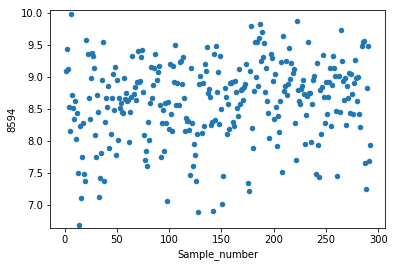

In [29]:
"""
ELF1 
""" 
df = GE_data_[GE_data_.Name==elf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name,ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

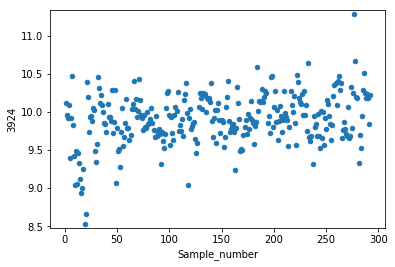

In [30]:
"""
IRF1 
""" 
df = GE_data_[GE_data_.Name==irf1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

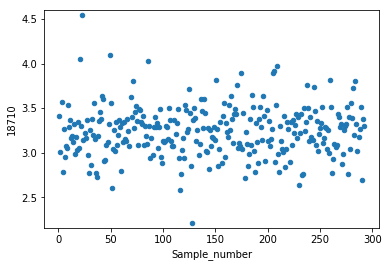

In [31]:
"""
SYNGR1
""" 
df = GE_data_[GE_data_.Name==syngr1].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

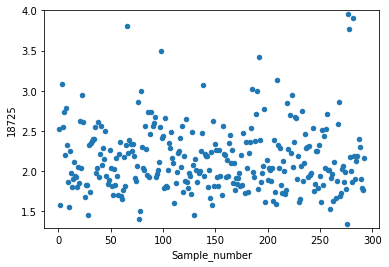

In [32]:
"""
UNC5A
""" 
df = GE_data_[GE_data_.Name==unc5a].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

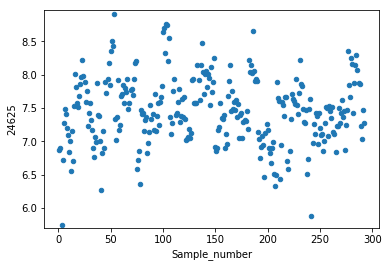

In [33]:
"""
MT1F
""" 
df = GE_data_[GE_data_.Name==mt1f].T.drop(['Name'])
column_name = df.columns.values[0]
column_name_list.append(column_name)
df[column_name] = df[column_name].astype(float)
df['Sample_number'] = range(1, len(df) + 1)
df.plot.scatter(x='Sample_number', y=column_name, ylim=(min(df[column_name]-0.05), max(df[column_name]+0.05))) 

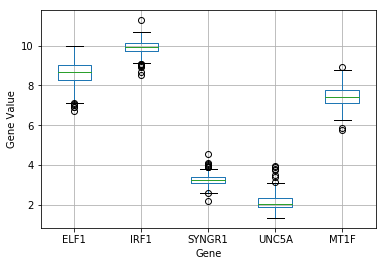

In [34]:
""" 
Box plot 
"""

df = GE_data_[GE_data_.Name.isin(gene_id_list)]
df = df.T.drop(['Name']) 
df = df.astype(float) 
df.boxplot(column=column_name_list).set_xticklabels(['ELF1', 'IRF1', 'SYNGR1','UNC5A','MT1F']) 
plt.xlabel("Gene")
plt.ylabel("Gene Value")

In [35]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
GE_data_['CV'] = GE_data_.apply(lambda row : cv(row.T.drop(['Name'])), axis = 1)  
GE_data_['Gene_number'] = range(1, len(GE_data_) + 1) 

(0, 0.1)

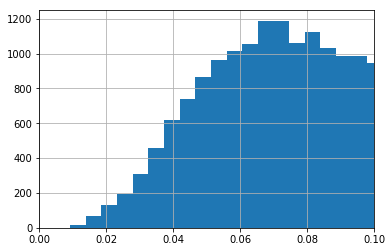

In [36]:
GE_data_['CV'].hist(bins=100).set_xlim(0,0.1)

In [37]:
for gene_ref_id in gene_id_list:
    print(GE_data_[GE_data_['Name']==gene_ref_id]['CV'] )

8594    0.071629
Name: CV, dtype: float64
3924    0.033759
Name: CV, dtype: float64
18710    0.087041
Name: CV, dtype: float64
18725    0.192035
Name: CV, dtype: float64
24625    0.067184
Name: CV, dtype: float64


In [38]:
sorted_raw_expre = GE_data_.sort_values(by='CV', ascending=False).reset_index()

In [39]:
for gene_ref_id in gene_id_list:
    print("gene_ref_id",gene_ref_id)
    print(sorted_raw_expre[sorted_raw_expre['Name']==gene_ref_id].index)

gene_ref_id 212420_PM_at
Int64Index([16823], dtype='int64')
gene_ref_id 202531_PM_at
Int64Index([24054], dtype='int64')
gene_ref_id 204287_PM_at
Int64Index([13180], dtype='int64')
gene_ref_id 236448_PM_at
Int64Index([805], dtype='int64')
gene_ref_id 217165_PM_x_at
Int64Index([17955], dtype='int64')
